In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state0 = [1.0, 1.0, 1.0]
time_steps = np.arange(0.0, 100.0, dt)

x_train = odeint(f, state0, time_steps)

In [15]:
from scipy import sparse

radius = 0.6
sparsity = 0.01
input_dim = 3
reservoir_size = 2000
n_steps_prerun = 10
regularization = 1e-2
sequence = x_train

In [16]:
weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))

In [17]:
def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states = np.squeeze(np.array(hidden_states))

In [18]:
weights_output = (np.linalg.inv(hidden_states.T@hidden_states + regularization * np.eye(reservoir_size)) @ hidden_states.T@targets).T

In [19]:
targets.shape

(9989, 3)

In [20]:
hidden_states.shape

(9989, 2000)

In [21]:
def predict(sequence, n_steps_predict):
    hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
    input = sequence[n_steps_prerun].reshape((-1, 1))
    outputs = []

    for t in range(n_steps_prerun, n_steps_prerun + n_steps_predict):
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
        hidden = augment_hidden(hidden)
        output = weights_output @ hidden
        input = output
        outputs.append(output)
    return np.array(outputs), hidden

In [22]:
weights_output.shape

(3, 2000)

In [23]:
x_sim, H = predict(sequence, 10000)

In [24]:
H

array([[0.95631345],
       [0.99577733],
       [0.99952589],
       ...,
       [1.        ],
       [0.05602998],
       [0.45176506]])

In [25]:
def plot_dimension(x_train, x_sim, dim, name):
    fig = plt.figure(figsize=(9,2))
    ax = fig.gca()
    ax.plot(time_steps, x_train[:, dim])
    ax.plot(time_steps, x_sim[:, dim], "--")
    plt.xlabel("time")
    plt.ylabel(name)

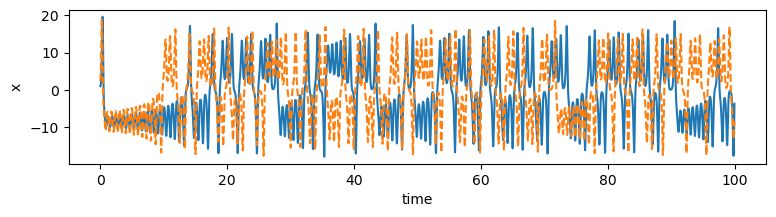

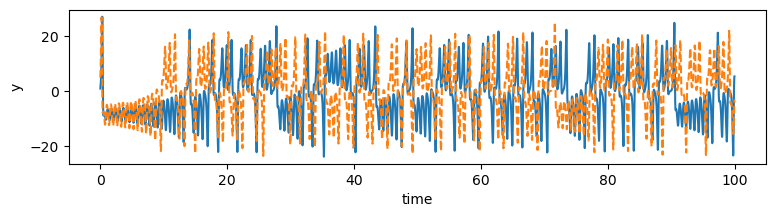

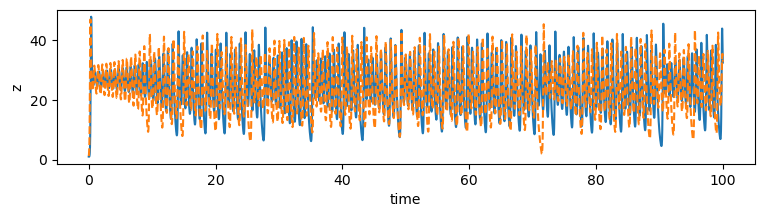

In [26]:
plot_dimension(x_train, x_sim, 0, 'x')
plot_dimension(x_train, x_sim, 1, 'y')
plot_dimension(x_train, x_sim, 2, 'z')

In [27]:
def rmse(x_train, x_sim, dim=0):
        res = 0
        for i in range(len(x_sim[:, dim])):
            res = res + (x_sim[:, dim][i] - x_train[:, dim][i])**2
        res = math.sqrt(res/len(x_sim[:, dim]))
        print('RMSE = ', res)
        return res

In [28]:
rmse(x_train, x_sim)

RMSE =  11.12332092527355


C:\Users\nicks\AppData\Local\Temp\ipykernel_1300\2746445941.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


11.12332092527355

In [29]:
hidden.shape

(2000, 1)

In [30]:
x_train.shape

(10000, 3)

In [31]:
x_sim.shape

(10000, 3, 1)

Пошла вторая

In [32]:
rho = 31.0
sigma = 15.0
beta = 40.0 / 3.0
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state0 = [20.5, 300.5, 1.5]
time_steps = np.arange(0.0, 10.0, dt)

x_train0 = odeint(f, state0, time_steps)
sequence = x_train0

In [33]:
x_sim0, H0 = predict(sequence, 1000)

In [34]:
H0

array([[ 0.91152331],
       [-0.56203862],
       [ 0.96818155],
       ...,
       [ 1.        ],
       [ 0.12754126],
       [ 0.3331733 ]])

ValueError: x and y must have same first dimension, but have shapes (1000,) and (10000,)

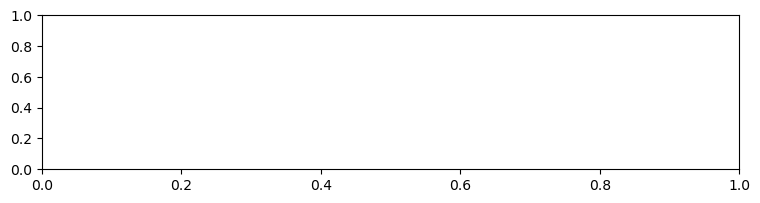

In [35]:
plot_dimension(x_train, x_sim, 0, 'x')

In [ ]:
rmse(x_train0, x_sim0)

RMSE =  14.00332883993935


C:\Users\nicks\AppData\Local\Temp\ipykernel_8700\2746445941.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


14.00332883993935

3-я

In [ ]:
rho = 29.0
sigma = 15.0
beta = 22.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state1 = [200.5, 3.5, 10.5]
time_steps = np.arange(0.0, 10.0, dt)

x_train1 = odeint(f, state1, time_steps)
sequence = x_train1

x_sim1, H1 = predict(sequence, 1000)

In [ ]:
rmse(x_train1, x_sim1)

RMSE =  35.025142495636345


C:\Users\nicks\AppData\Local\Temp\ipykernel_8700\2746445941.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


35.025142495636345

4-я

In [ ]:
rho = 33.0
sigma = 15.0
beta = 28.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [200.5, 3.5, 10.5]
time_steps = np.arange(0.0, 10.0, dt)

x_train2 = odeint(f, state2, time_steps)
sequence = x_train2

x_sim2, H2 = predict(sequence, 1000)

rmse(x_train2, x_sim2)

RMSE =  39.786651446821466


C:\Users\nicks\AppData\Local\Temp\ipykernel_8700\2746445941.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


39.786651446821466

Пробуем

In [ ]:
HH = H@H.T

In [ ]:
HH.shape

(1000, 1000)

In [ ]:
HH0 = H0@H0.T
HH1 = H1@H1.T
HH2 = H2@H2.T


In [ ]:
x_train.shape

(1000, 3)

In [ ]:
X = x_train[:, 0].reshape(1000,1)

In [ ]:
X0 = x_train0[:, 0].reshape(1000,1)
X1 = x_train1[:, 0].reshape(1000,1)
X2 = x_train2[:, 0].reshape(1000,1)

In [ ]:
HX = np.dot(HH, x_train)

In [ ]:
HX0 = np.dot(HH0, x_train0)
HX1 = np.dot(HH1, x_train1)
HX2 = np.dot(HH2, x_train2)

In [ ]:
HX.shape

(1000, 3)

In [ ]:
H.shape

(1000, 1)

In [ ]:
X.shape

(1000, 1)

In [ ]:
ldE = np.zeros((1000, 1000))
ldE[np.diag_indices(1000)] = regularization
ldE

array([[0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.01]])

In [ ]:
s1 = HH + HH0 + HH1 + HH2

In [ ]:
s1 = s1 + ldE

In [ ]:
s1 = np.linalg.inv(s1)

In [ ]:
s2 = HX + HX0 + HX1 + HX2

In [ ]:
Wout = s1@s2

In [ ]:
Wout.shape

(1000, 3)

In [ ]:
weights_output.shape

(3, 1000)

In [ ]:
s2.shape

(1000, 3)

In [ ]:
H.shape

(1000, 1)

In [ ]:
weights_hidden.shape, Wout.shape

((1000, 1000), (1000, 3))

In [ ]:
def predict0(sequence, n_steps_predict):
    hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
    input = sequence[n_steps_prerun].reshape((-1, 1))
    outputs = []

    for t in range(n_steps_prerun, n_steps_prerun + n_steps_predict):
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
        hidden = augment_hidden(hidden)
        output = Wout.T @ hidden
        input = output
        outputs.append(output)
    return np.array(outputs), hidden

In [ ]:
rho = 33.0
sigma = 15.0
beta = 28.5
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state2 = [200.5, 3.5, 10.5]
time_steps = np.arange(0.0, 10.0, dt)

x_train2 = odeint(f, state2, time_steps)
sequence = x_train2

x_sim20, H20 = predict0(sequence, 1000)

rmse(x_train2, x_sim20)

RMSE =  5150.0076897902245


C:\Users\nicks\AppData\Local\Temp\ipykernel_8700\2746445941.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


5150.0076897902245

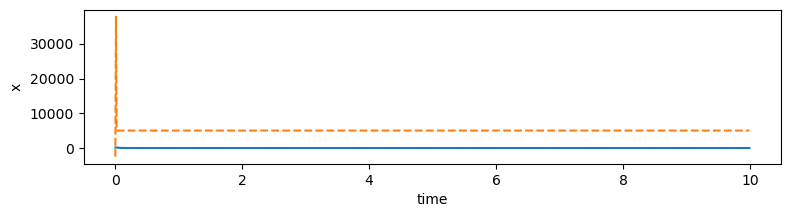

In [ ]:
plot_dimension(x_train2, x_sim20, 0, 'x')

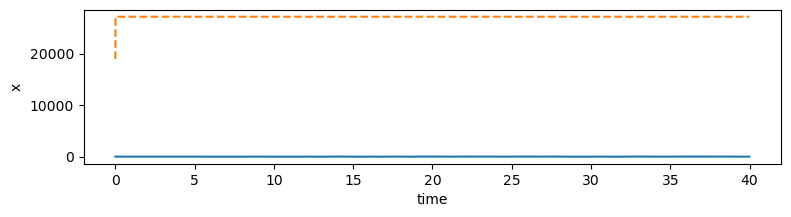

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state0 = [1.0, 1.0, 1.0]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

from scipy import sparse

radius = 0.6
sparsity = 0.01
input_dim = 3
reservoir_size = 1000
n_steps_prerun = 10
regularization = 1e-2
sequence = x_train

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))


def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states = np.squeeze(np.array(hidden_states))

x_sim, H = predict0(sequence, 4000)

def plot_dimension(x_train, x_sim, dim, name):
    fig = plt.figure(figsize=(9,2))
    ax = fig.gca()
    ax.plot(time_steps, x_train[:, dim])
    ax.plot(time_steps, x_sim[:, dim], "--")
    plt.xlabel("time")
    plt.ylabel(name)

plot_dimension(x_train, x_sim, 0, 'x')

In [ ]:
bestrmse = rmse(x_train, x_sim)
print('RMSE = ', bestrmse)

RMSE =  27164.472774071277
RMSE =  27164.472774071277


C:\Users\nicks\AppData\Local\Temp\ipykernel_8700\2746445941.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


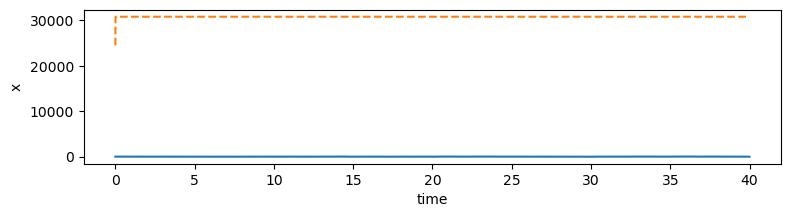

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 29.0
sigma = 10.0
beta = 10.0 / 3.0
dt = 0.01

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state0 = [1.0, 1.0, 1.0]
time_steps = np.arange(0.0, 40.0, dt)

x_train = odeint(f, state0, time_steps)

from scipy import sparse

radius = 0.6
sparsity = 0.01
input_dim = 3
reservoir_size = 1000
n_steps_prerun = 10
regularization = 1e-2
sequence = x_train

weights_hidden = sparse.random(reservoir_size, reservoir_size, density=sparsity)
eigenvalues, _ = sparse.linalg.eigs(weights_hidden)
weights_hidden = weights_hidden / np.max(np.abs(eigenvalues)) * radius

weights_input = np.zeros((reservoir_size, input_dim))
q = int(reservoir_size / input_dim)
for i in range(0, input_dim):
    weights_input[i * q:(i + 1) * q, i] = 2 * np.random.rand(q) - 1

weights_output = np.zeros((input_dim, reservoir_size))


def initialize_hidden(reservoir_size, n_steps_prerun, sequence):
    hidden = np.zeros((reservoir_size, 1))
    for t in range(n_steps_prerun):
        input = sequence[t].reshape(-1, 1)
        hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    return hidden

def augment_hidden(hidden):
    h_aug = hidden.copy()
    h_aug[::2] = pow(h_aug[::2], 2.0)
    return h_aug

hidden = initialize_hidden(reservoir_size, n_steps_prerun, sequence)
hidden_states = []
targets = []

for t in range(n_steps_prerun, len(sequence) - 1):
    input = np.reshape(sequence[t], (-1, 1))
    target = np.reshape(sequence[t + 1], (-1, 1))
    hidden = np.tanh(weights_hidden @ hidden + weights_input @ input)
    hidden = augment_hidden(hidden)
    hidden_states.append(hidden)
    targets.append(target)

targets = np.squeeze(np.array(targets))
hidden_states = np.squeeze(np.array(hidden_states))

x_sim, H = predict0(sequence, 4000)

def plot_dimension(x_train, x_sim, dim, name):
    fig = plt.figure(figsize=(9,2))
    ax = fig.gca()
    ax.plot(time_steps, x_train[:, dim])
    ax.plot(time_steps, x_sim[:, dim], "--")
    plt.xlabel("time")
    plt.ylabel(name)

plot_dimension(x_train, x_sim, 0, 'x')

In [ ]:
bestrmse = rmse(x_train, x_sim)
print('RMSE = ', bestrmse)

RMSE =  30817.693620549864
RMSE =  30817.693620549864


C:\Users\nicks\AppData\Local\Temp\ipykernel_8700\2746445941.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res = math.sqrt(res/len(x_sim[:, dim]))


In [ ]:
Wout = (np.linalg.inv(hidden_states.T@hidden_states + regularization * np.eye(reservoir_size)) @ hidden_states.T@targets).T